In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os

np.set_printoptions(precision=3,suppress=True)

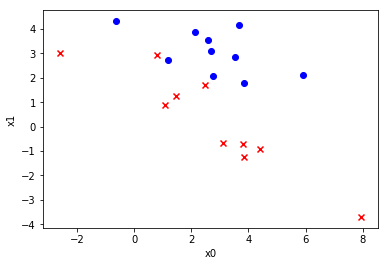

[[ 1.    -0.635  4.35 ]
 [ 1.     2.595  3.568]
 [ 1.     2.141  3.867]
 [ 1.     5.919  2.122]
 [ 1.     3.531  2.849]
 [ 1.     2.684  3.098]
 [ 1.     3.855  1.803]
 [ 1.     2.758  2.084]
 [ 1.     3.658  4.163]
 [ 1.     1.201  2.716]
 [ 1.     7.925 -3.702]
 [ 1.     4.418 -0.923]
 [ 1.     3.82  -0.694]
 [ 1.     0.787  2.946]
 [ 1.     1.459  1.256]
 [ 1.     1.076  0.895]
 [ 1.     3.122 -0.673]
 [ 1.    -2.592  3.007]
 [ 1.     2.469  1.729]
 [ 1.     3.839 -1.263]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
num_iters = 1000
alpha = 0.2

# class 0:
# covariance matrix and mean

cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 10
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 10
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

X = np.concatenate((r0,r1))
X = np.append(np.ones((len(X),1)), X, axis=1)
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1
print(X)
print(y)

m = len(y)
theta = np.array([1.1, 2.0, -.9]) 

Text(0,0.5,'$g(x)$')

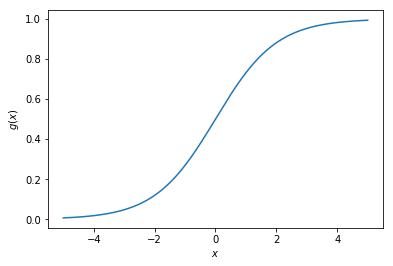

In [3]:
# Aufgabe  1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# test on a few values
xx = np.linspace(-5, 5, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

In [4]:
# Aufgabe 2
def logistic_hypothesis(theta):
    def h(X):
        y = sigmoid(np.dot(X, theta))
        return y
    return h


# test
theta_test_0 = np.array([1.1, 2.0, -.9]) 
h_test_0 = logistic_hypothesis(theta_test_0)
X_test_0 = X.copy()
print(h_test_0(X_test_0))

[0.017 0.956 0.87  1.    0.996 0.975 0.999 0.991 0.991 0.742 1.    1.
 1.    0.506 0.947 0.92  1.    0.001 0.989 1.   ]


In [5]:
# Aufgabe 3
def cross_entropy_loss(h, X, y):
    def loss(theta):
        h = logistic_hypothesis(theta)
        temp = np.dot(y, np.log(h(X))) + np.dot((1-y), np.log(1- h(X)))
        return temp
    return loss


# test
theta_test_1 = np.array([1.1, 2.0, -.9]) 
h_test_1 = logistic_hypothesis(theta_test_1)
X_test_1 = X.copy()
y_test_1 = y.copy()

loss_test_1 = cross_entropy_loss(h_test_1, X_test_1, y_test_1)
print(loss_test_1(theta_test_1))

-73.57817104208345


In [6]:
# Aufgabe 4
def cost_function(X, y, h, theta):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta)
    return cost

# test
theta_test_2 = np.array([1.1, 2.0, -.9]) 
h_test_2 = logistic_hypothesis(theta_test_2)
X_test_2 = X.copy()
y_test_2 = y.copy()

cost_test_2 = cost_function(X_test_2, y_test_2, h_test_2, theta_test_2)
print(cost_test_2)

3.678908552104173


In [39]:
# Aufgabe 5
# a) 
def compute_new_theta(X, y, theta, alpha, h):
    theta = theta - np.dot(np.transpose(X), h(X) - y)*(alpha/m)
    return theta

# test
theta_test_3 = np.array([1.1, 2.0, -.9]) 
h_test_3 = logistic_hypothesis(theta_test_3)
X_test_3 = X.copy()
y_test_3 = y.copy()

theta_test_3 = compute_new_theta(X_test_3, y_test_3, theta_test_3, alpha, h_test_3)
print(theta_test_3)

[ 1.031  1.719 -0.822]


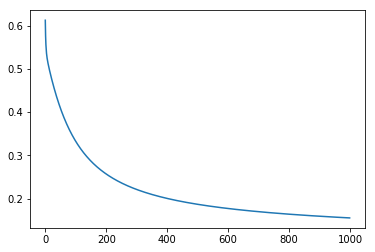

In [8]:
# b), c)
def gradient_descent(alpha, theta, X, y):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = logistic_hypothesis(theta)
        theta = compute_new_theta(X, y, theta, alpha, h)
        for j in range(m):
            j = cost_function(X, y, h, theta)
            J_history[i] = j
    return J_history, theta

# test
theta_test_4 = np.array([0, 0, 0]) 
h_test_4 = logistic_hypothesis(theta_test_4)
X_test_4 = X.copy()
y_test_4 = y.copy()

J_history, theta_result = gradient_descent(alpha, theta_test_4, X_test_4, y_test_4)
plt.plot(J_history)

In [9]:
# test Y
print("Y_before till 10: ", y[:10])
h = logistic_hypothesis(theta_result)
y_after = h(X)
print("Y_after_gradient_descent till 10: ", y_after[:10])

Y_before till 10:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Y_after_gradient_descent till 10:  [0.86  0.981 0.982 0.991 0.97  0.954 0.84  0.726 0.998 0.622]


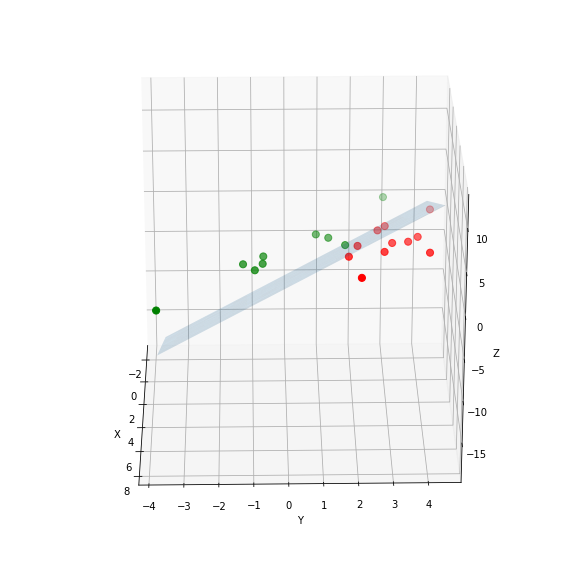

In [10]:
# Aufgabe 6
def plot3D(X, y, theta_result):
    
    # data
    data = np.c_[X[:, 1], X[:, 2], y]
    
    # negative/positive points
    pos = y >= 0.5
    neg = y <= 0.5
    
    X_0_pos = X[pos,1]
    X_0_pos = X_0_pos.reshape(len(X_0_pos), 1)
    X_1_pos = X[pos,2]
    X_1_pos = X_1_pos.reshape(len(X_1_pos), 1)
    Y_pos = y[pos]
    Y_pos = Y_pos.reshape(len(Y_pos), 1)
    
    X_0_neg = X[neg,1]
    X_0_neg = X_0_neg.reshape(len(X_0_neg), 1)
    X_1_neg = X[neg,2]
    X_1_neg = X_1_neg.reshape(len(X_1_neg), 1)
    Y_neg = y[neg]
    Y_neg = Y_neg.reshape(len(Y_neg), 1)
    
    # plot plane
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0]  
    fig1 =  plt.figure(figsize=(10, 10))
    ax = fig1.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    
    # plot points
    ax.scatter(X_0_neg, X_1_neg, Y_neg, c='g', s=50)
    ax.scatter(X_0_pos, X_1_pos, Y_pos, c='r', s=50)
    
    # plot finish
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    
    # rotate
    for angle in range(0, 360):
        ax.view_init(25, angle)

# test
X_test = X.copy()
y_after_test = y_after.copy()
theta_result_test = theta_result.copy()
plot3D(X_test, y_after, theta_result_test)

In [11]:
# Plotting 3d mit Plotly

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Import plotly package
import plotly
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py

def plotly3D(X, y, theta):
    
    data = np.c_[X[:, 1], X[:, 2], y]
    
    pos = y >= 0.5
    neg = y <= 0.5 
    
    # plot points and fitted surface using Plotly
    X_0_pos = X[pos,1]
    X_0_pos = X_0_pos.reshape(len(X_0_pos), 1)
    X_1_pos = X[pos,2]
    X_1_pos = X_1_pos.reshape(len(X_1_pos), 1)
    Y_pos = y[pos]
    Y_pos = Y_pos.reshape(len(Y_pos), 1)
    
    X_0_neg = X[neg,1]
    X_0_neg = X_0_neg.reshape(len(X_0_neg), 1)
    X_1_neg = X[neg,2]
    X_1_neg = X_1_neg.reshape(len(X_1_neg), 1)
    Y_neg = y[neg]
    Y_neg = Y_neg.reshape(len(Y_neg), 1)
    
    data0 = np.c_[X_0_pos, X_1_pos, Y_pos]
    data1 = np.c_[X_0_neg, X_1_neg, Y_neg]
    
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    XX = X.flatten()
    YY = Y.flatten()
        
    # best-fit linear plane (1st-order)
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    
    # evaluate it on grid
    Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0] 
    
    trace0 = go.Scatter3d(
        x=data0[:,0],
        y=data0[:,1],
        z=data0[:,2],
        mode='markers',
        marker=dict(size=4, color='green', line=dict(color='black', width=0.5), opacity=0.8)
    )
    
    trace1 = go.Scatter3d(
        x=data1[:,0],
        y=data1[:,1],
        z=data1[:,2],
        mode='markers',
        marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.8)
    )
    
    trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.999)
    
    # Package the trace dictionary into a data object
    data_test1 = go.Data([trace0, trace1, trace2])
    
    # Dictionary of style options for all axes
    axis = dict(
        showbackground=True, # show axis background
        backgroundcolor="rgb(204, 204, 204)", # set background color to grey
        gridcolor="rgb(255, 255, 255)",       # set grid line color
        zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
    )
    
    # Make a layout object
    layout = go.Layout(
        title='1st-order (linear) plane', # set plot title
        scene=go.Scene(  # axes are part of a 'scene' in 3d plots
            xaxis=go.XAxis(axis), # set x-axis style
            yaxis=go.YAxis(axis), # set y-axis style
            zaxis=go.ZAxis(axis)),  # set z-axis style
    )
    
    # Make a figure object
    fig = go.Figure(data=data_test1, layout=layout)
    
    # Send to Plotly and show in notebook
    py.iplot(fig, filename='test1')

# test
X_test = X.copy()
y_after_test = y_after.copy()
theta_result_test = theta_result.copy()
plotly3D(X_test, y_after, theta_result_test)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kochetov0824/0 or inside your plot.ly account where it is named 'test1'


In [12]:
# Aufgabe 7
# Klassifikationsfehler = Anzahl der falsch-klassifizierten Datensätze / Anzahl der Datensätze
def classif_error(y_after, y):
    m = len(y)
    counter = 0
    for i in range(m):
        if (y_after[i] >= 0.5):
            y_after[i] = 1
        else:
            y_after[i] = 0
            
        if (y_after[i] != y[i]):
            counter = counter + 1          
    return counter / m

# test
y_after_test_7 = y_after.copy()
y_test_7 = y.copy()
error_number = classif_error(y_after_test_7, y_test_7)
print(error_number)

0.05


![title](cost_reg.png)

In [13]:
# Aufgabe 8
def cost_function_reg(X, y, h, theta, lambda_reg):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta) + (lambda_reg/(2*m))*np.sum(np.square(theta[1:]))
    return cost

# test
theta_test_8 = np.array([1.1, 2.0, -.9]) 
h_test_8 = logistic_hypothesis(theta_test_8)
X_test_8 = X.copy()
y_test_8 = y.copy()
lambda_reg_test_8 = 1

cost_test_8 = cost_function_reg(X_test_8, y_test_8, h_test_8, theta_test_8, lambda_reg_test_8)
print(cost_test_8)

3.799158552104173


![title](gradient_reg.png)

In [92]:
# Aufgabe 9 
def compute_new_theta_reg(X, y, theta, alpha, h, lam):
    
    # make an array of lambdas 
    lamarray = np.ones(len(theta)) * lam
    
    # zero out first element so se don't regularize constant term
    lamarray[0] = 0.0
    
    # number of training samples
    m = len(y)
    
    grad = theta - (alpha * ((np.dot(np.transpose(X), h(X) - y)) * (1/m) + (lamarray * theta) * (1/m)))  
            
    return grad
    

# test
theta_test_9 = np.array([1.1, 2.0, -.9])
h_test_9 = logistic_hypothesis(theta_test_9)
X_test_9 = X.copy()
y_test_9 = y.copy()
lambda_reg_test_9 = 1

theta_result_9 = compute_new_theta_reg(X_test_9, y_test_9, theta_test_9, alpha, h_test_9, lambda_reg_test_9)
print(theta_result_9)

[ 1.031  1.699 -0.813]


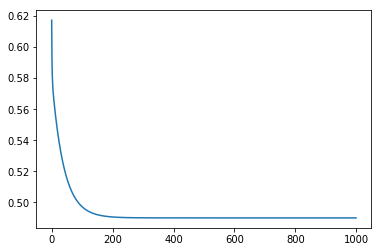

In [97]:
# b), c)
def gradient_descent_reg(alpha, theta, X, y, lam):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = logistic_hypothesis(theta)
        theta = compute_new_theta_reg(X, y, theta, alpha, h, lam)
        for j in range(m):
            j = cost_function_reg(X, y, h, theta, lam)
            J_history[i] = j
    return J_history, theta

# test
theta_test_11 = np.array([0, 0, 0]) 
h_test_11 = logistic_hypothesis(theta_test_4)
X_test_11 = X.copy()
y_test_11 = y.copy()
lambda_reg_test_11 = 10

J_history, theta_result = gradient_descent_reg(alpha, theta_test_11, X_test_11, y_test_11, lambda_reg_test_11)
plt.plot(J_history)

In [95]:
# test Y
print("Y_before till 10: ", y[:10])
h = logistic_hypothesis(theta_result)
y_after = h(X)
print("Y_after_gradient_descent till 10: ", y_after[:10])

Y_before till 10:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Y_after_gradient_descent till 10:  [0.792 0.937 0.942 0.959 0.915 0.889 0.746 0.654 0.988 0.587]
